In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [2]:

file_path = '/Users/katigbakv/Desktop/border.csv' 
data = pd.read_csv(file_path)


data['Date'] = pd.to_datetime(data['Date'], format='%b %Y', errors='coerce')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [16]:
monthly_data = data.groupby(['Year', 'Month']).agg({'Value': 'sum'}).reset_index()


monthly_pivot = monthly_data.pivot_table(index=['Year', 'Month'], values='Value', fill_value=0)
monthly_pivot.reset_index(inplace=True)


features = ['Year', 'Month', 'Value']


scaler = StandardScaler()


scaled_data = scaler.fit_transform(monthly_pivot[features])

scaled_df = pd.DataFrame(scaled_data, columns=features)

monthly_pivot.head(15)

,Year,Month,Value
0,1996,1,32550342.0
1,1996,2,32212625.0
2,1996,3,35509073.0
3,1996,4,35690321.0
4,1996,5,37644486.0
5,1996,6,37731632.0
6,1996,7,40333161.0
7,1996,8,40728924.0
8,1996,9,36195902.0
9,1996,10,35913743.0


In [18]:
scaled_df = pd.DataFrame(scaled_data, columns=features)

scaled_df['Month_sin'] = np.sin(2 * np.pi * scaled_df['Month'])
scaled_df['Month_cos'] = np.cos(2 * np.pi * scaled_df['Month'])

scaled_df['Value_lag1'] = scaled_df['Value'].shift(1)



scaled_df = scaled_df.dropna()


X = scaled_df[['Year', 'Month_sin', 'Month_cos', 'Value_lag1']]
y = scaled_df['Value']

scaled_df.head(15)

,Year,Month,Value,Month_sin,Month_cos,Value_lag1
1,-1.672085,-1.296585,-0.120034,-0.957468,-0.288541,-0.073499
2,-1.672085,-1.005928,0.334193,-0.037235,0.999307,-0.120034
3,-1.672085,-0.715270,0.359168,0.976286,-0.216487,0.334193
4,-1.672085,-0.424613,0.628438,-0.456158,-0.889899,0.359168
5,-1.672085,-0.133955,0.640446,-0.745754,0.666222,0.628438
6,-1.672085,0.156702,0.998919,0.833045,0.553205,0.640446
7,-1.672085,0.447360,1.053452,0.324751,-0.945800,0.998919
8,-1.672085,0.738017,0.428833,-0.997167,-0.075219,1.053452
9,-1.672085,1.028675,0.389954,0.179195,0.983814,0.428833
10,-1.672085,1.319332,-0.011425,0.906606,-0.421979,0.389954


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_
feature_names = X.columns
sorted_importances = sorted(zip(importances, feature_names), reverse=True)
print("Feature Importances:", sorted_importances)


y_pred = model.predict(X_test)

y_pred

Feature Importances: [(0.5244842402397917, 'Year'), (0.41452849503632594, 'Value_lag1'), (0.03186243487801738, 'Month_sin'), (0.029124829845865067, 'Month_cos')]


array([-0.71051244, -0.48219499, -0.53229382, -0.4365087 , -0.64080007,
       -0.40301702, -0.92757221, -0.21345161,  0.89906869, -0.27569373,
       -1.65893754,  0.62323303,  2.01886113,  0.8184975 , -2.1257708 ,
        1.56148959,  0.55557406, -0.45151444, -0.61620096,  0.82257952,
        0.25879494,  0.98832852, -0.30748481,  0.3404804 , -0.12974607,
       -1.07349472,  0.61831511, -0.57416422,  0.01164237, -0.54892576,
        1.54396706,  0.27282708, -0.29233389,  0.45339816,  1.51639942,
        0.56065227, -0.27957768, -0.54830501,  0.71271739,  0.15406452,
       -0.27620952, -1.11869699,  0.11530046,  0.80578916,  0.56787261,
        0.76076379, -0.27593203,  0.24920879,  1.38355931, -0.48054135,
        0.95850105, -0.9363636 , -2.1095604 ,  1.42093712,  1.37385748,
       -0.137845  ,  0.58380718, -0.31827129, -0.60361241, -0.30961139,
       -0.56278158,  0.72183777, -0.77725131,  1.53982576, -0.81028135,
       -0.48643979,  0.61650032,  0.94224144,  1.45510503])

In [13]:
y_pred_original = (y_pred * scaler.scale_[-1]) + scaler.mean_[-1]


y_test_original = (y_test * scaler.scale_[-1]) + scaler.mean_[-1]
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1443391.2917391309
Root Mean Squared Error (RMSE): 2085200.9203009647
R² Score: 0.9147


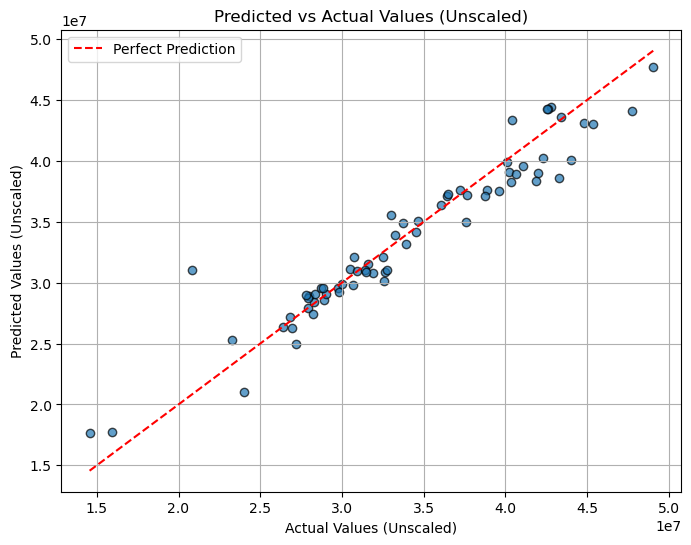

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.7, edgecolor='k')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], '--r', label='Perfect Prediction')
plt.title('Predicted vs Actual Values (Unscaled)')
plt.xlabel('Actual Values (Unscaled)')
plt.ylabel('Predicted Values (Unscaled)')
plt.legend()
plt.grid(True)
plt.show()